# Machine Learning - SS18

* Lecturer: Prof. Dr. Volker Tresp
* Assistants: Julian Busch, Christian Frey
* Tutor: Changkun Ou

## Before Start

- I am always assume you already read the assignment
- Feel free to ask me any related questions, let's discuss it together
- Feel free to interrupt me any time if you find my mistakes or too fast
- Don't be too quiet, we will get boring

## 2nd Tutorial - 04/19/18

## Class of Halfspaces

In the lecture, we have already discussed the hypothesis class of halfspaces. They are designed for binary classification problems, i.e., we have a design matrix $\mathcal{X} \in \mathbb{R}^d$ and a set of labels $\mathcal{Y}=\{-1, 1\}$. The class of halfspaces is defined as follows:

$$
HS_d = sign \circ L_d = \{x \mapsto sign(h_{w,b}(x)): h_{w,b} \in L_{d}\}
$$

with $h_{w,b}(x) = \langle w, x \rangle + b$, $b \in \mathbb{R}$ and $L_d$ being the class of affine functions $L_d = \{h_{w,b}: w \in \mathbb{R}^d, b \in \mathbb{R}\}$.

A convenient way is to **incorporate the bias $b$ into $w$ as an extra coordinate and add an extra coordinate with a value of $1$** to all $x \in X$, i.e., $w' = (b, w_1, w_2, \ldots, w_d) \in \mathbb{R}^{d+1}$ and $x' = (1, x_1, x_2, \ldots, x_d) \in \mathbb{R}^{d+1}$ 

## Perceptron

The activation function of the Perceptron is a sum of weighted inputs:

$$
\sum_{j=1}^{M} w_j x_j
$$

The **binary classification $y \in \{-1, 1\}$** is calculated as $\hat{y} = \textbf{sign}(h)$. The linear separating hyperplane is defined by $h(x) = 0$. The bias $b$ determines the class when all inputs are zero.

The Perceptron is an iterative algorithm that constructs a sequence of vectors $w^{(1)}, w^{(2)}, \ldots$. Initially, $w^{(1)}$ is set to be the all-zeros vector. At iteration $t$, the Perceptron finds an example $i$ that is mislabeled by $w^{t}$, namely, an example for which $\textbf{sign}(\langle w^{(t)}, x_i \rangle) \neq y_i$. Then, the perceptron updates $w^{t}$ by adding to it the instance $x_i$ scaled by the label $y_i$ and a learning parameter $\eta$.

### Perceptron Learning rule
To learn a separating hyperplane, we need a learning rule to find optimal parameters for the weighting vector $w$ and the bias $b$. In the native perceptron learning rule, one presents randomly selected currently misslcassified patterns and adapts with only the current selected pattern. Let $x_t$ and $y_t$ be the training pattern in the $t$-th step. One adapts $t=1,2, \ldots$

$$
w_{j} \leftarrow w_j + \eta y_t x_{t,j}
$$

A weight increases, when (postsynaptic) $y_t$ and (presynaptic) $x_{t,j}$ have the same sign; different signs lead to a weight decrease.

### TASKS
+ write a class $\textit{Perceptron}$
+ in the __init__ method, initialize variables necessary for the Perceptron model
+ in the train(X,Y) method, we train the Perceptron according to the dataset and labels attached as parameters. If the number of iterations exceed a predefined maximal number of iterations, we say that the Perceptron could not identify a separating hyperplane. In each iteration, we check for misclassified datapoints, i.e., where $sign(\langle w^{(t)}, x_i \rangle) \neq y_i$ does not hold. If we have found a missclassified point, we adapt the weight vector $w$ according to the perceptron learning rule $w_{j} \leftarrow w_j + \eta y_t x_{t,j}$. If all points are classified correctly, the learning procedure is finished and the vector $w$ describes our weighting vector, our model.  


In [52]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
class Perceptron(object):
    """
    Perceptron Classifier.
    
    Parameter
    ---------
    eta : float
        Learning rate (between 0..0 and 1.0)
    max_iter : int
        Passes (epochs) over the training set.
    
    Attributes
    ---------
    w : 1d-array
        Weights after fitting.
    eta: float
        Learning rate
    max_iter: int
        maximal number of iterations
    """
    
    def __init__(self, eta=0.1, max_iter=1000):
        self.eta = eta
        self.max_iter = max_iter
        self.weights = None
        self.inter_weights = []
        
    def train (self, X, Y):
        '''
        Training method for data.
        
        Parameters
        ----------
        X : Training vectors
        y : Target values
            
        Returns
        -------
        w_ : 1d-array; Weights after fitting.
        '''
        (n_samples, n_features) = X.shape
        self.weights = np.random.rand(n_features+1, 1)
        X = np.c_[np.ones((n_samples, 1)), X]

        Y_hat = np.sign(np.dot(X, self.weights))
        for iteration in range(0, self.max_iter):
            if np.array_equal(Y, Y_hat):
                break
            for sample in range(0, n_samples):
                if Y[sample] != Y_hat[sample]:
                    self.weights += self.eta * Y[sample] * X[sample][:, np.newaxis]
                    self.inter_weights.append(np.copy(self.weights))
                    Y_hat = np.sign(np.dot(X, self.weights))
        return self.weights

### TASKS
Having defined our Perceptron and our learning procedure, we will use synthesized data to learn the model. Hence,
+ define a procedure to create $n$ datapoints.
+ Each datapoint $x_i$ has $dim$ features.
+ To do so, we will define each feature to be selected randomly in the interval [-1,1]

In [54]:
def generate_data(n, dim):
    '''
    Generating training data.
        
    Parameters
    ----------
    n : the number of samples 
    dim: number of features.

    Returns
    -------
    X : training vectors
    '''
    X1 = np.random.rand(n//2, dim) - 1
    X2 = np.random.rand(n - n//2, dim)
    X = np.r_[X1, X2]

    Y1 = np.zeros((n - n//2, 1)) - 1
    Y2 = np.ones((n//2, 1))
    Y = np.r_[Y1, Y2]
    return X, Y

### TASKS
Let's define a function to plot our dataset and linear separating hyplane in the two-dimensional case. As parameters, we attach the dataset, the labels and and instance of our learned perceptron model. With the labels at hand, we can use different markers for the two classes $\{-1,1\}$.
(hint: use marker="x" or marker="o" to have dots or X as markers. If you want, you can in addition define different colors for the classes)

In [55]:
def plot2D(X, Y, p):
    '''
    Plots the data points and the separating hyperplane in the two dimensional case
    
    Parameters
    ----------
    X: matrix containing the data points
    Y: label of the data points
    p: instance of trained perceptron model
    '''
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten())
    
    inter_weights = p.inter_weights
    for index, weights in enumerate(inter_weights):
        a = - weights[1] / weights[2]
        b = - weights[0] / weights[2]
        x = [-1, 1]
        y = [a*e+b for e in x]
        if index == len(inter_weights) - 1:
            plt.plot(x, y, 'r-')
        else:
            plt.plot(x, y, 'b--')
    plt.show()

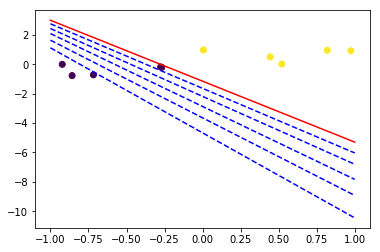

In [56]:
X, Y = generate_data(10, 2)

p = Perceptron()
p.train(X, Y)

plot2D(X, Y, p)

## Extra Contents

In [57]:
# prepare for data
one = [
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [0,1,0]
]
two = [
    [1,1,1],
    [0,0,1],
    [1,1,1],
    [1,0,0],
    [1,1,1]
]
three = [
    [1,1,1],
    [0,0,1],
    [0,1,1],
    [0,0,1],
    [1,1,1]
]
four = [
    [1,0,1],
    [1,0,1],
    [1,1,1],
    [0,0,1],
    [0,0,1]
]
five = [
    [1,1,1],
    [1,0,0],
    [1,1,1],
    [0,0,1],
    [1,1,1]
]
six = [
    [1,1,1],
    [1,0,0],
    [1,1,1],
    [1,0,1],
    [1,1,1]
]
seven = [
    [1,1,1],
    [0,0,1],
    [0,0,1],
    [0,0,1],
    [0,0,1]
]
eight = [
    [1,1,1],
    [1,0,1],
    [1,1,1],
    [1,0,1],
    [1,1,1]
]
nine = [
    [1,1,1],
    [1,0,1],
    [1,1,1],
    [0,0,1],
    [1,1,1]
]
zero = [
    [1,1,1],
    [1,0,1],
    [1,0,1],
    [1,0,1],
    [1,1,1]
]
numbers = [one, two, three, four, five, six, seven, eight, nine, zero]

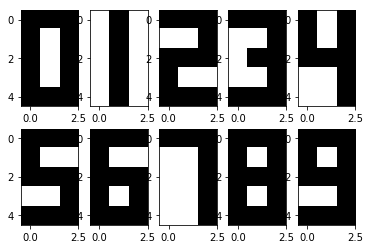

In [58]:
# convert numbers to numpy array
np_numbers = [np.array(element, dtype=float) for element in numbers]

# print all number via plt.imshow method
fig = plt.figure(0)
for index in range(0, 10):
    plt.subplot2grid((2, 5), (int(index / 5), index%5))
    plt.imshow(np_numbers[index-1], cmap='binary')
plt.show()

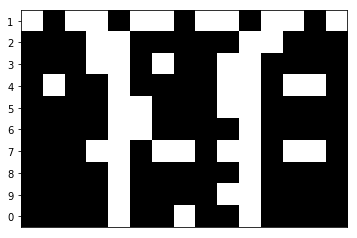

In [59]:
# Flatten all number into one matrix

data = np.array([np.array(element, float).flatten() for element in numbers], float)
targets = [f"{x % 10}" for x in range(1, 11)]

fig, ax = plt.subplots()
img = ax.imshow(data, cmap='binary')
ax.set_yticks(np.arange(len(targets)))
ax.set_yticklabels(targets)
ax.get_xaxis().set_visible(False)
plt.show()